In [ ]:
# This may require a runtime restart in order to work
!pip install 'pandas==1.3.0'

In [ ]:
!pip install config

In [ ]:
!pip install 'tweepy==4.4.0'

In [ ]:
!pip install pyspellchecker

In [ ]:
# Standard Packages
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud

# NLTKPackages
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

# Nearal Network packages
import keras
import tensorflow as tf
from sklearn import preprocessing, model_selection
from keras.models import Sequential, load_model 
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import ModelCheckpoint

# Sklearn pacckages 
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
FILE_PATH = '/content/drive/MyDrive/ML/GBC/DL1/Project/'
RANDOM_SEED = 42

In [ ]:
# Load the data set
data = pd.read_csv(
    FILE_PATH + 'sentiment_analysis_dataset.csv',
    sep=',',
    on_bad_lines='skip',
    encoding='latin-1'
    )

print(data.shape)
data.head(5)

(1578612, 4)


,ï»¿ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [ ]:
# check for null data
data.isna().sum()

ï»¿ItemID          0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

In [ ]:
# The Item ID column is not useful for us, drop it
data = data.drop(['ï»¿ItemID'], axis=1)

In [ ]:
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import re

def clean_text(text):
  spell = SpellChecker()
  tk = TweetTokenizer()
  lemmatizer = WordNetLemmatizer()

  stopword_list = stopwords.words('english')

  new_stop_words=['i', 'im', 'http',  'ive']
  for i in new_stop_words:
      stopword_list.append(i)

  cleaned_text = []

  for sentence in text:
    cleaned_sentence = []
    for word in tk.tokenize(sentence):
      # Spell check
      word = spell.correction(word.lower())

      # Remove stop words
      if word in stopword_list:
        continue

      # Remove numbers and punctuation
      word = re.sub('[^a-zA-Z]+', '', word)

      if (word == ''):
        continue

      # Lemmatize
      word = lemmatizer.lemmatize(word)

      cleaned_sentence.append(word)

    cleaned_text.append(cleaned_sentence)
  
  return cleaned_text

In [ ]:
text = clean_text(data['SentimentText'].iloc[0:15])

NameError: ignored

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


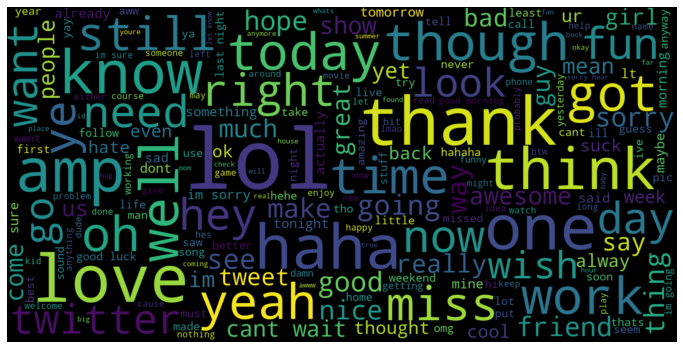

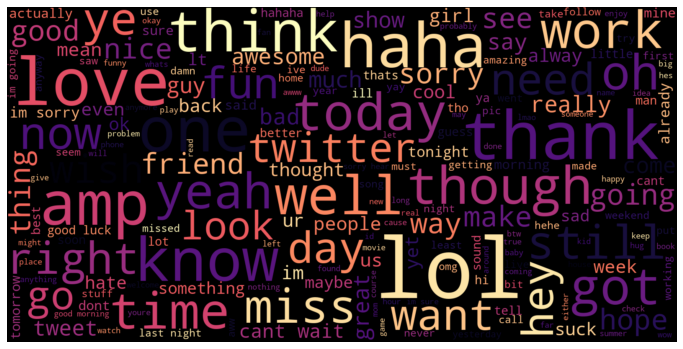

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/5
5000/5000 [==============================] - 21s 4ms/step - loss: 0.5162 - accuracy: 0.7410 - val_loss: 0.5022 - val_accuracy: 0.7491
Epoch 2/5
5000/5000 [==============================] - 14s 3ms/step - loss: 0.4927 - accuracy: 0.7569 - val_loss: 0.4967 - val_accuracy: 0.7549
Epoch 3/5
5000/5000 [==============================] - 14s 3ms/step - loss: 0.4710 - accuracy: 0.7701 - val_loss: 0.4950 - val_accuracy: 0.7566
Epoch 4/5
5000/5000 [==============================] - 15s 3ms/step - loss: 0.4418 - accuracy: 0.7879 - val_loss: 0.5007 - val_accuracy: 0.7562
Epoch 5/5
5000/5000 [==============================] - 13s 3ms/step - loss: 0.4032 - accuracy: 0.8099 - val_loss: 0.5246 - val_accuracy: 0.7521
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


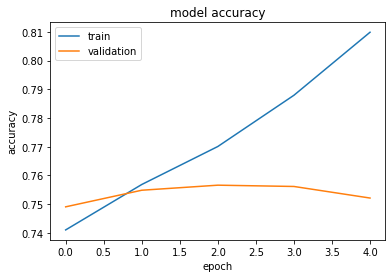

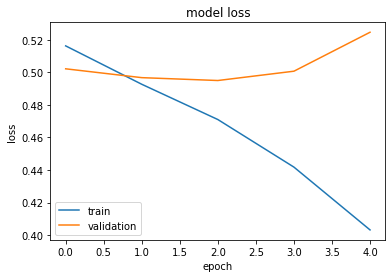

In [ ]:
# Remove all the stop words inn the dataset
ddata['X_Clean'] = ddata['SentimentText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


# Select a portion of the data
data = ddata.iloc[:500000]


# Create a subset to clean
df_ = data.iloc[:,4]

# convert to lower case and split 
df_ = df_.str.lower()

# keep only words
regex_pat = re.compile(r'[^a-zA-Z\s]', flags=re.IGNORECASE)
df_ = df_.str.replace(regex_pat, '')

# join the cleaned words in a list
df_ = df_.str.join("")

# Drop columns
data = data.drop(['ï»¿ItemID','SentimentSource','SentimentText','X_Clean'],axis =1)


# create df that sentiment and clean text
tfid_data = pd.concat([data,df_], axis=1)

# Create a positive and Negative word Cloud

# 1= postive 
neg_tweets = tfid_data[tfid_data.Sentiment == 1]
neg_string = []
for t in tfid_data.X_Clean:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 0-=negative
pos_tweets = tfid_data[tfid_data.Sentiment == 0]
pos_string = []
for t in tfid_data.X_Clean:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

# Amount of words to be used in the TFIDF
max_words = 2000


#-- tf-idf --> Word level ----------------------------------------------------
tfidf_vect_w = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', 
                             max_features=max_words)

tfidf_vect_w_mat = tfidf_vect_w.fit_transform(tfid_data.iloc[:,1])
tfidf_w_names = tfidf_vect_w.get_feature_names()

DF_tfidf_word = pd.DataFrame (tfidf_vect_w_mat.todense())


#-- Assign the column names
DF_tfidf_word.columns = tfidf_w_names


# Prepare data for training

X = np.asarray(DF_tfidf_word, dtype='float64') 

Y = tfid_data.iloc[:,0]
ttrain_y = tf.keras.utils.to_categorical(Y, num_classes=2, dtype='float32')


# Split the data into train and test data
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,ttrain_y,test_size = 0.2, random_state = 0)


# Define your Neural Network
model = Sequential()
model.add(Dense(550, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(225, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))
    
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])   
    

# Fit your model
checkpointer = ModelCheckpoint(filepath="weights.hdf5", monitor = 'val_acc', verbose=1, save_best_only=True) 

history = model.fit(
                    train_x, 
                    train_y, 
                    epochs=5, 
                    batch_size=80, 
                    callbacks = [checkpointer], 
                    validation_data = (test_x, test_y)
                    )


# Save the model as twitter.h5
model_name = "twitter.h5"
model.save(model_name)
model = load_model(model_name)

y_pred = model.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

test_y=np.argmax(test_y, axis =1)


# 1= postive 
# 0-=negative
labels = ['negative', 'positive']

# Create a Confusion Matrix
cm = confusion_matrix(y_pred, test_y)

print(history.history.keys())


# Plot your training and validation curves
plt.subplots() # open a new plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

plt.subplots() # open a new plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()




